**Practical: Word Embedding Using Word2Vec and GloVe**

Objective:

To understand and implement word embeddings using two popular techniques: Word2Vec and GloVe. These methods convert words into vector representations, enabling machines to understand text in a mathematical form that captures semantic relationships between words.

Steps:

Install necessary libraries

Word2Vec implementation using gensim library

GloVe implementation using pre-trained embeddings

Visualizing word embeddings using t-SNE

1. Install Necessary Libraries

To get started, install the required libraries. You need gensim for Word2Vec, and glove-python or pre-trained GloVe embeddings from an external file.

In [2]:
#pip install gensim
#pip install glove-python-binary
#pip install sklearn
#pip install matplotlib


2. Word2Vec Implementation using gensim

The gensim library provides an easy-to-use implementation of the Word2Vec model. We'll train it on a small corpus and visualize the results.

Word2Vec embedding for 'embeddings':
[ 0.0054888  -0.0167182   0.01571161  0.01707221 -0.01916817  0.00489253
  0.01980994 -0.01533161 -0.01393384 -0.01547303  0.01679185 -0.00136267
  0.01828882 -0.01631644  0.00748617  0.00527009  0.00148543  0.00465535
 -0.01493819 -0.01871675  0.00470915  0.01229691  0.01597138  0.01147179
 -0.00155467  0.01661233 -0.01867263  0.00681227  0.00053351  0.00771449
  0.01477157 -0.01345033  0.01116896 -0.01904445 -0.00160892 -0.01737747
 -0.01019735  0.01857845 -0.00371652  0.00582885  0.01814256  0.01787627
 -0.01641687 -0.00602463  0.01977321  0.01020886 -0.00317617 -0.01738404
  0.00592303 -0.0133518 ]


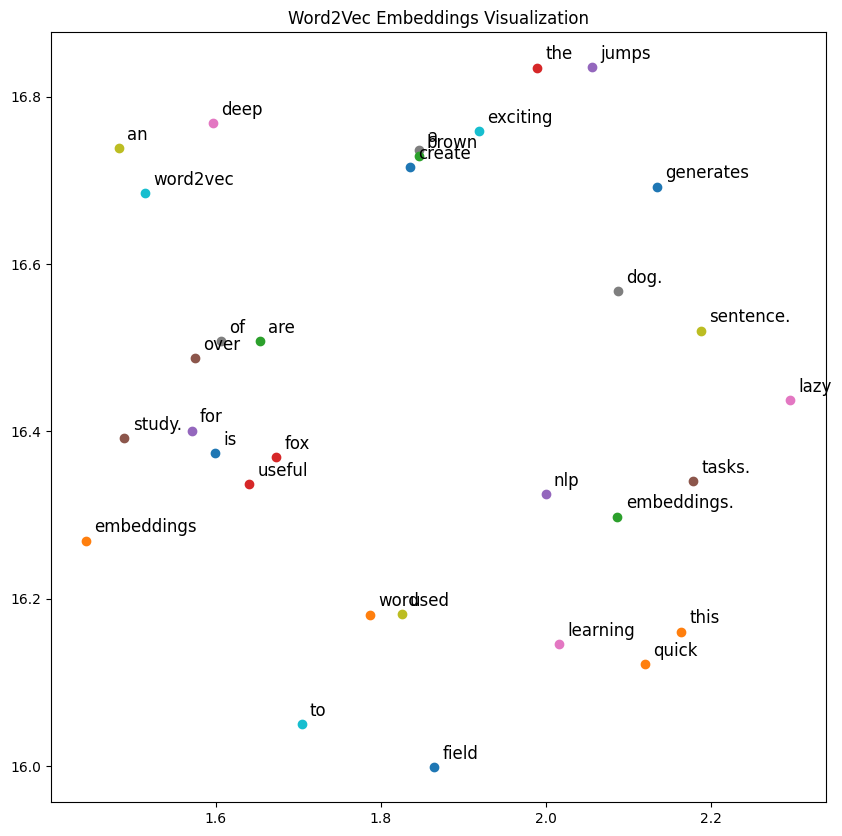

In [5]:
# Import necessary libraries
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Sample corpus: List of sentences to train Word2Vec
corpus = [
    "This is a sentence.",
    "Word2Vec generates word embeddings.",
    "Word embeddings are useful for NLP tasks.",
    "Deep learning is used to create embeddings.",
    "The quick brown fox jumps over the lazy dog.",
    "NLP is an exciting field of study."
]

# Step 1: Preprocessing the corpus (tokenizing words)
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

# Step 2: Train Word2Vec model on the tokenized corpus
# Word2Vec takes the list of tokenized sentences to create word embeddings
word2vec_model = Word2Vec(sentences=tokenized_corpus, vector_size=50, window=3, min_count=1, sg=0)

# Step 3: Get the word embeddings for a word
word = "embeddings"
embedding = word2vec_model.wv[word]  # Get the vector representation of the word "embeddings"
print(f"Word2Vec embedding for '{word}':")
print(embedding)

# Step 4: Visualize the embeddings using t-SNE
# We will visualize the top words' embeddings in a 2D plot using t-SNE (t-distributed Stochastic Neighbor Embedding)
# Visualize the embeddings using t-SNE
words = list(word2vec_model.wv.index_to_key)  # Get the list of words
word_vectors = np.array([word2vec_model.wv[word] for word in words])  # Convert to NumPy array

# Reduce dimensions from 50 to 2 using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)  # Ensure word_vectors is a NumPy array

# Plot the words in a 2D space
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=12)
plt.title("Word2Vec Embeddings Visualization")
plt.show()



Explanation of Code:

Corpus Preprocessing: We tokenize the corpus into words. Each sentence is converted to lowercase and split into a list of words.

Word2Vec Model:

vector_size=50: This defines the dimensionality of the word vectors (embedding size).

window=3: The context window used to predict words in the corpus.

min_count=1: Words with fewer than 1 occurrence are ignored.

sg=0: This indicates the Continuous Bag of Words (CBOW) approach, which is one of the two architectures for Word2Vec (the other is Skip-gram).

Word Embedding Extraction: The word embedding for a word (e.g., "embeddings") is extracted from the trained model.

Visualization with t-SNE: We use t-SNE to reduce the dimensionality of the embeddings (from 50 to 2) and plot them in a 2D space.


3. GloVe Implementation Using Pre-trained Embeddings

GloVe (Global Vectors for Word Representation) is a word embedding technique similar to Word2Vec but based on matrix factorization techniques on the word co-occurrence matrix.

We’ll use pre-trained GloVe embeddings (e.g., glove.6B.50d.txt).

GloVe embedding for 'computer':
[ 0.079084 -0.81504   1.7901    0.91653   0.10797  -0.55628  -0.84427
 -1.4951    0.13418   0.63627   0.35146   0.25813  -0.55029   0.51056
  0.37409   0.12092  -1.6166    0.83653   0.14202  -0.52348   0.73453
  0.12207  -0.49079   0.32533   0.45306  -1.585    -0.63848  -1.0053
  0.10454  -0.42984   3.181    -0.62187   0.16819  -1.0139    0.064058
  0.57844  -0.4556    0.73783   0.37203  -0.57722   0.66441   0.055129
  0.037891  1.3275    0.30991   0.50697   1.2357    0.1274   -0.11434
  0.20709 ]


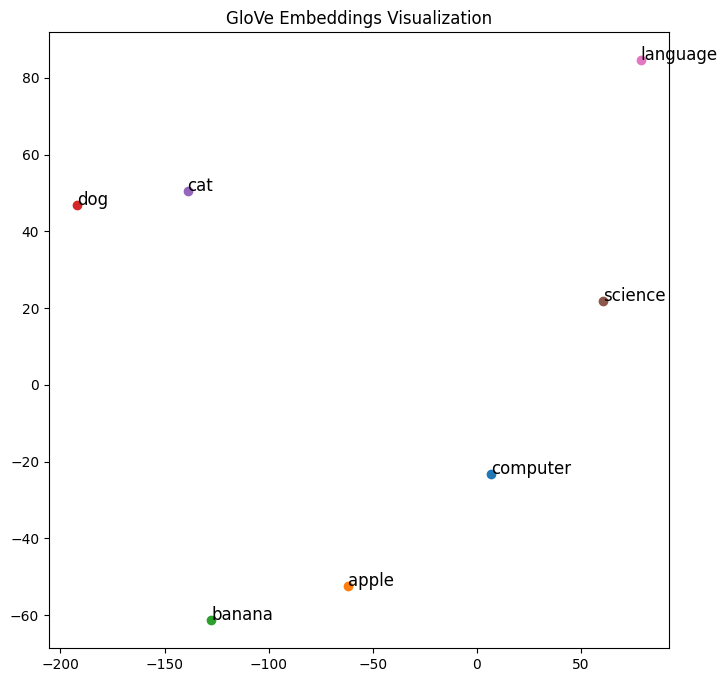

In [9]:
# Import necessary libraries
import numpy as np

# Load pre-trained GloVe embeddings (50-dimensional vectors)
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load GloVe model from a pre-trained file (make sure to have glove.6B.50d.txt)
glove_embeddings = load_glove_embeddings('glove.6B.50d.txt')

# Check embedding for a word, e.g., "computer"
word = "computer"
embedding = glove_embeddings.get(word)
print(f"GloVe embedding for '{word}':")
print(embedding)

# Visualizing a few words' embeddings (using t-SNE)
# Visualizing a few words' embeddings (using t-SNE)
words = ["computer", "apple", "banana", "dog", "cat", "science", "language"]
word_vectors = np.array([glove_embeddings[word] for word in words])  # Convert to NumPy array

# Reduce dimensions to 2 using t-SNE
tsne = TSNE(n_components=2, perplexity=3, random_state=42)  # Lower perplexity to avoid the error
reduced_vectors = tsne.fit_transform(word_vectors)  # Ensure word_vectors is a NumPy array

# Plot the words in 2D space
plt.figure(figsize=(8, 8))
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=12)
plt.title("GloVe Embeddings Visualization")
plt.show()


Explanation of Code:

Loading GloVe Embeddings: We load pre-trained GloVe embeddings from the file glove.6B.50d.txt. Each line in the file corresponds to a word followed by its vector.

Word Embedding Extraction: We extract the GloVe embedding for the word "computer".

Visualization with t-SNE: Similar to Word2Vec, we use t-SNE to reduce the dimensionality of the embeddings (from 50 to 2) and plot them in a 2D space.

4. Comparison Between Word2Vec and GloVe

Word2Vec is a predictive model that learns word representations by predicting words from their context (CBOW or Skip-gram).

GloVe is a count-based model that learns word representations by factoring the word co-occurrence matrix into low-dimensional vectors.

In terms of results, Word2Vec tends to capture more semantic and syntactic relationships between words, while GloVe captures the global statistics of the corpus and is generally used with pre-trained vectors.



Conclusion:

Word2Vec and GloVe are both powerful methods to represent words as dense vectors.

Word2Vec is trained using a neural network approach, while GloVe works by factorizing the word co-occurrence matrix.
The visualizations produced by t-SNE show how these models group similar words together in vector space, enabling better text understanding for downstream tasks like classification, clustering, and recommendation systems.